# Mediasystem

**Контекст**

Фармацевтические препараты - один из наиболее быстро растущих сегментов рынка с точки зрения продаж и размера инвестиций в рекламу на телевидении.  Между большинством компаний фармацевтического сектора идет жесткая конкурентная борьба за рост продаж, и, как следствие, за лидерство в ТВ размещении. У бренда X основная задача - растить продажи.

**Задача**

Построить модель для бренда X из фарм категории.
Сделать прогноз по росту продаж, если в следующем году планируется закупка рекламы на ТВ для бренда Х в размере 5500 TRP.
Дать рекомендации для бизнеса и, возможно, рекомендации по изменению рекламной поддержки бренда на следующий год

**Бизнес вопросы, на которые нужно ответить при помощи анализа/модели**

* Как реклама на ТВ повлияла на продажи бренда? 
* Какая количественная связь между продажами и рекламой? 
* Надо ли менять стратегию поддержки бренда в следующем году для ускорения роста продаж?

**Решение**

Результаты c выводами и рекомендациями предоставить в MS PowerPoint или другом удобном формат (не в excel)
Объем презентации на ваше усмотрение

**Описание данных**

* Units - Продажи в штуках
* Sales, rub - Продажи в рублях
* Category sales, rub - Продажи категории
* Category units - Продажи категории в штуках
* Non_TV spends - медиа затраты (кроме телевизора)
* TRP - Рейтинги TV в единицах измерения ТВ рекламы
* TV_spends - Стоимость размещения на тв
* TRP_Competitor_1 - Рейтинги конкурента 1
* TRP_Competitor_2 - Рейтинги конкурента 2
* TRP_Competitor_3 - Рейтинги конкурента 3
* TRP_Competitor_4 - Рейтинги конкурента 4
* TRP_Competitor_5 - Рейтинги конкурента 5


**План проекта**

1. Предобработка данных
2. EDA Анализ
3. Подготовка к обучению модели
4. Обучение моделей и проверка качества
5. Визуализация
6. Прогноз
7. Вывод

## Предобработка

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# загрузим данные
file = 'Mediasystem.xlsx'
xl = pd.ExcelFile(file)

print(xl.sheet_names)

df = xl.parse('Data')

['Задание', 'Data', 'Data_description']


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     44 non-null     datetime64[ns]
 1   Units
 (Brand X)         44 non-null     int64         
 2   Sales, rub (Brand X)     44 non-null     int64         
 3   Category sales, rub      44 non-null     int64         
 4   Category units           44 non-null     int64         
 5   Non-TV spends (Brand X)  44 non-null     float64       
 6   TRP (Brand X)            44 non-null     int64         
 7   TV spends  (Brand X)     44 non-null     float64       
 8   TRP_Competitor_1         44 non-null     int64         
 9   TRP_Competitor_2         44 non-null     int64         
 10  TRP_Competitor_3         44 non-null     int64         
 11  TRP_Competitor_4         44 non-null     int64         
 12  TRP_Competitor_5         44 non-null  

,Date,Units\n (Brand X),"Sales, rub (Brand X)","Category sales, rub",Category units,Non-TV spends (Brand X),TRP (Brand X),TV spends (Brand X),TRP_Competitor_1,TRP_Competitor_2,TRP_Competitor_3,TRP_Competitor_4,TRP_Competitor_5
0,2013-01-15,101010,52107917,369004673,1291598,0.000000e+00,526,4.332734e+06,790,571,96,0,0
1,2013-02-15,113758,58089497,436639366,1587868,0.000000e+00,437,5.658147e+06,500,274,337,0,0
2,2013-03-15,114979,59292688,479904035,1589302,0.000000e+00,720,1.151373e+07,285,641,396,0,0
3,2013-04-15,155589,79251686,627408870,1784739,2.323906e+06,1317,1.512565e+07,0,272,391,0,0
4,2013-05-15,167965,85757810,732761761,2089945,3.540694e+06,913,9.502889e+06,1078,842,444,0,0


In [4]:
# для удобства переименуем столбцы
df.set_axis(['date','count_sales','sales_rub','category_sales_rub', 
             'category_count_sales','non_tv_spends','TRP','tv_spends',
             'TRP_competitor_1','TRP_competitor_2','TRP_competitor_3','TRP_competitor_4','TRP_competitor_5'], 
            axis = 'columns',inplace = True)

In [5]:
# установим дату в индекс, так как она уникальна для каждого значения
df.set_index('date', drop=True, inplace=True)

In [6]:
# округлим стоимость рекламы
df['non_tv_spends'] = df['non_tv_spends'].astype('int64')
df['tv_spends'] = df['tv_spends'].astype('int64')

## Анализ

Проведем предварительный анализ

<AxesSubplot:>

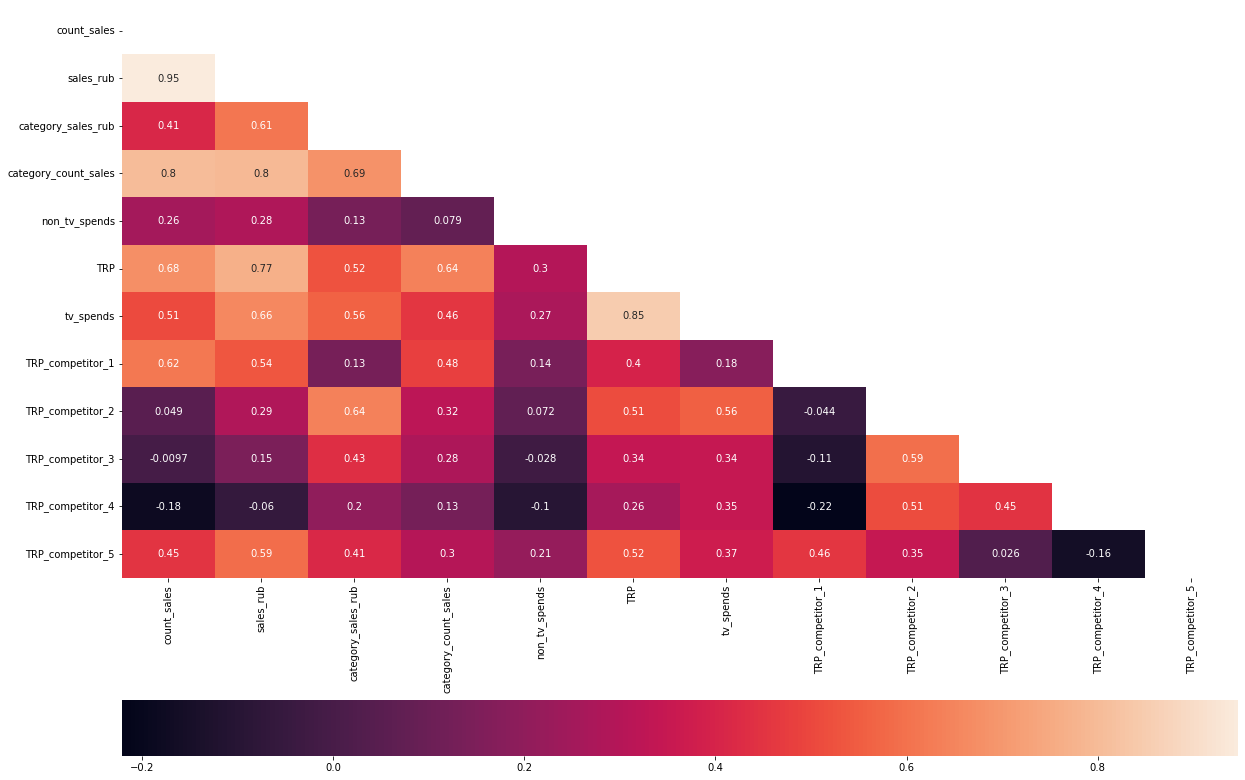

In [7]:
# построим тепловую карту
figure, ax = plt.subplots(1, figsize=(20, 15))

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cbar_kws= {'orientation': 'horizontal'})

* рейтинги на тв коррелируют с объемом продаж в рублях 0.77
* рейтинги на тв с количеством купленных товаров 0.68
* медиа затраты с объемом продаж 0.26
* медиа затраты с количеством купленных товаров 0.28

Чтобы в дальнейшем распределить планируемую закупку рекламы в течение года, введем новые метрики:
* стоимость одной единицы рекламы
* прибыльность одной единицы рекламы 
* коэффициент эффективности рекламы относительно ее стоимости (AER advertising effectiveness ratio). Рассчитаем следующим образом:
  * (прибыль / количество рекламы в единицах ее измерения) / (стоимость размещения на ТВ / количество рекламы в единицах ее измерения)

In [8]:
df['year'] = df.index.year
df['cor_per_ad'] = round(df['tv_spends'] / df['TRP'], 2)
df['profit_per_ad'] = round(df['sales_rub'] / df['TRP'], 2)
df['aer'] = round((df['sales_rub'] / df['TRP']) / (df['tv_spends'] / df['TRP']), 2)

df.fillna(0, inplace=True)

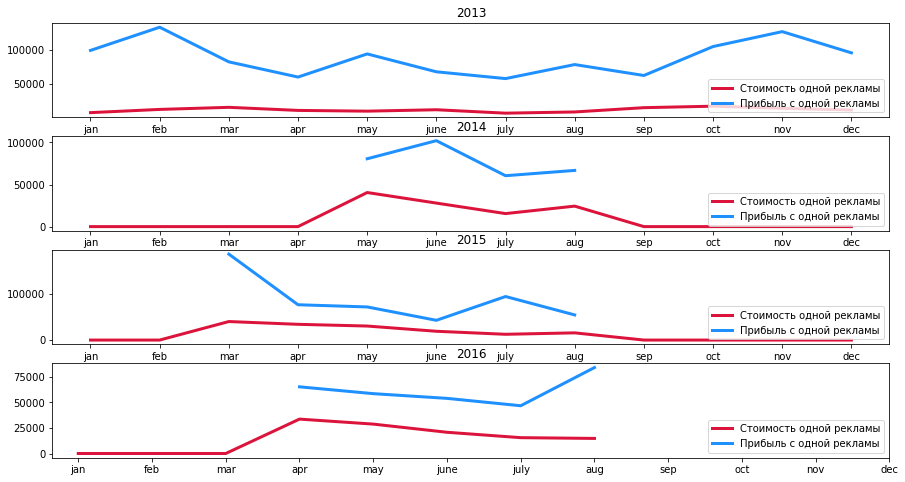

In [624]:
fig, axs = plt.subplots(4, 1, figsize=(15, 8))

years = [2013, 2014, 2015, 2016]

for i in range(4):
    
    y = df[df['year'] == years[i]].reset_index(drop=True)
    y.plot(y='cor_per_ad', alpha=1, lw=3, ax=axs[i], color='crimson')
    y.plot(y='profit_per_ad', alpha=1, lw=3, ax=axs[i], color='dodgerblue')
    
    axs[i].legend(('Стоимость одной рекламы', 'Прибыль с одной рекламы'), loc = 'lower right')
    axs[i].set_xticks(range(0,12))
    axs[i].set_xticklabels(['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'])
    axs[i].set_title(years[i])

plt.show()

На графике мы можем проследить, как меняется стоимость рекламы и ее эффективность в течении года:
* весной каждого года стоимость рекламы увеличивается, однако ее эффективность не повышается, возможно стоит закупать рекламу ближе к концу года
* к концу года стоимость рекламы идет на спад, однако ее эффективность повышается и прибыль с одной рекламы растет

In [625]:
# стандартизируем стоимость и количество рекламы,чтобы посмотреть распределение доходов и трат на рекламу
def scaler(df):
    
    scaler = StandardScaler()
    scaler.fit(df)
    
    return scaler.transform(df)

scaler_df = pd.DataFrame(scaler(df.loc[:,['sales_rub', 'TRP', 'tv_spends', 'non_tv_spends']]),
                         columns=['sales_rub', 'TRP', 'tv_spends', 'non_tv_spends'])
scaler_df['year'] = list(df['year'])

Построим диаграммы распределения доходов и трат на рекламу

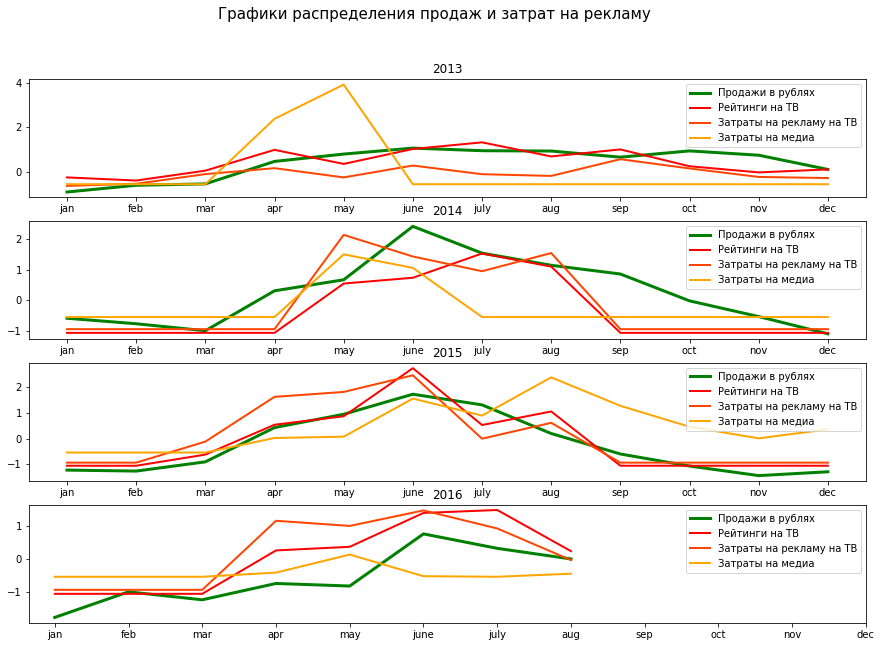

In [626]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

years = [2013, 2014, 2015, 2016]

for i in range(4):
    
    y = scaler_df[scaler_df['year'] == years[i]].reset_index(drop=True)
    y.plot(y='sales_rub', alpha=1,  ax=axs[i], c='g', lw=3)
    y.plot(y='TRP', alpha=1, ax=axs[i], c='red', lw=2)
    y.plot(y='tv_spends', alpha=1, ax=axs[i], c='orangered', lw=2)
    y.plot(y='non_tv_spends', alpha=1, ax=axs[i], c='orange', lw=2)
    
    axs[i].legend(('Продажи в рублях', 'Рейтинги на ТВ', 'Затраты на рекламу на ТВ', 'Затраты на медиа'), loc = 'upper right')
    axs[i].set_xticks(range(0,12))
    axs[i].set_xticklabels(['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'])
    axs[i].set_title(years[i])

fig.suptitle('Графики распределения продаж и затрат на рекламу', fontsize=15)
plt.show()

Исходя из графиков мы можем сделать следующие выводы:
* сумма продаж меняется в течении года равномерно, количество продаж растет к середине года и снижается к концу
* изменения в затратах на медиа не имеют сильного влияния на продажи, так в апреле 2013 года возросли затраты на медиа рекламу без существенного роста продаж, то же самое произошло в мае 2014 и в августе 2015 
* затраты на рекламу на ТВ и соответственно количество ТВ рейтинга в большей степени влияет на продажи: если растут затраты на ТВ рекламу - растут продажи

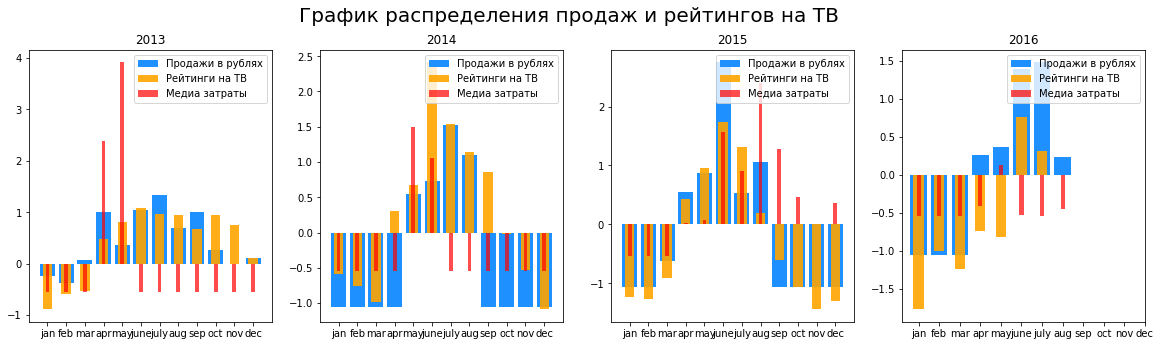

In [627]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))

years = [2013, 2014, 2015, 2016]

for i in range(4):
    
    y = scaler_df[scaler_df['year'] == years[i]].reset_index(drop=True)
    
    axs[i].bar(x=y.index, height=y['TRP'], color='dodgerblue')
    axs[i].bar(x=y.index, height=y['sales_rub'], alpha=0.9, color='orange', width = 0.5)
    axs[i].bar(x=y.index, height=y['non_tv_spends'], alpha=0.7, color='red', width = 0.2)
    
    axs[i].legend(('Продажи в рублях', 'Рейтинги на ТВ', 'Медиа затраты'), loc = 'upper right')
    axs[i].set_xticks(range(0,12))
    axs[i].set_xticklabels(['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'])
    axs[i].set_title(years[i])
    
fig.suptitle('График распределения продаж и рейтингов на ТВ', fontsize=20, y=1)
plt.show()

Как мы можем видеть на графике: в апреле/мае 2013 года, а также в мае 2014 и в августе 2015 возросли затраты на медиа рекламу, однако это не привело к существенным изменениям общей суммы продаж.
Также прослеживается тенденция увеличения продаж относительно увеличения рейтингов на ТВ.

## Подготовка к обучению модели

**Нам необходимо построить модель для бренда X из фарм категории, которая сделает прогноз по росту продаж, если в следующем году планируется закупка рекламы на ТВ для бренда Х в размере 5500 TRP.**

Предположим, что закупка рекламы планируется на 2017 год, для прогноза нам необходимо добавить данные на 2017 год в датасет и с помощью обученной модели спрогнозировать продажи на год.

**Выделим временной ряд с продажами и рейтингом.**

In [628]:
# возьмем целевой признак - продажи и признак,который нам будет известен - рейтинги на ТВ.
data = df.loc[:,['sales_rub','TRP']]

Этапы построения модели:
1. Создадим признаки для нашей выборки
2. Разделим на выборки
3. Обучим модель
4. Улучшим ее качество на валидационной выборке
5. Визуализируем предсказания
6. Добавим данные за 2017 год и сделаем предсказания

**Добавим признаки в датасет.**

In [629]:
# переведем индекс в формат даты
data.index = pd.to_datetime(data.index)

In [630]:
# напишем функцию, которая добавляет сезоны года
def seas(data):
    data['seasons'] = 0
    
    for i in range(len(data['seasons'])):
        if data.index.month[i] in [1, 2, 12]:
            data['seasons'][i] = 1
        elif data.index.month[i] in [3, 4, 5]:
            data['seasons'][i] = 2
        elif data.index.month[i] in [6, 7, 8]:
            data['seasons'][i] = 3
        else: 
            data['seasons'][i] = 4
    return data

In [631]:
# добавим сезоны
old_data = seas(data['2013-01-15':'2016-08-15'])

In [632]:
# функция, которая добавляет признаки
def make_features(data, max_lag, rolling_mean_size):
    
    d = data.copy()
    # добавим признаки даты
    d['month'] = d.index.month
    d['year'] = d.index.year
    
    # предыдущая прибыль
    for lag in range(1, max_lag + 1):
        d['lag_{}'.format(lag)] = d['sales_rub'].shift(lag)
        
    # скользящее среднее
    d['rolling_mean'] = d['sales_rub'].rolling(rolling_mean_size).mean()
    d['rolling_mean'] = d['rolling_mean'].shift()
    
    return d

In [633]:
old_data = make_features(old_data, 12, 3)

In [634]:
# удалим пропуски и заменим тип на int
old_data = old_data.dropna()
old_data['seasons'] = old_data['seasons'].astype('int64')
old_data.head()

,sales_rub,TRP,seasons,month,year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean
date,,,,,,,,,,,,,,,,,,
2014-01-15,58222745,0,1,1,2014,72121828.0,84745304.0,88582049.0,83015769.0,88452998.0,88758692.0,91066038.0,85757810.0,79251686.0,59292688.0,58089497.0,52107917.0,8.181639e+07
2014-02-15,54675041,0,1,2,2014,58222745.0,72121828.0,84745304.0,88582049.0,83015769.0,88452998.0,88758692.0,91066038.0,85757810.0,79251686.0,59292688.0,58089497.0,7.169663e+07
2014-03-15,50143631,0,2,3,2014,54675041.0,58222745.0,72121828.0,84745304.0,88582049.0,83015769.0,88452998.0,88758692.0,91066038.0,85757810.0,79251686.0,59292688.0,6.167320e+07
2014-04-15,75969703,0,2,4,2014,50143631.0,54675041.0,58222745.0,72121828.0,84745304.0,88582049.0,83015769.0,88452998.0,88758692.0,91066038.0,85757810.0,79251686.0,5.434714e+07
2014-05-15,83104918,1031,2,5,2014,75969703.0,50143631.0,54675041.0,58222745.0,72121828.0,84745304.0,88582049.0,83015769.0,88452998.0,88758692.0,91066038.0,85757810.0,6.026279e+07


**Разделим на выборки**

In [635]:
# возьмем обучающую выборку с 2013 по 2015 год и валидационную за 2016 год
train = old_data.loc['2013-06-15':'2015-12-15']
valid = old_data.loc['2016-01-15':'2016-08-15']

features_train = train.drop('sales_rub', axis=1)
target_train = train['sales_rub']
features_valid = valid.drop('sales_rub', axis=1)
target_valid = valid['sales_rub']

## Обучение модели

**Подберем параметры для признаков и моделей**

**Линейная регрессия**

In [636]:
# обучим модель, чтобы подобрать параметры
lr_model = LinearRegression().fit(features_train, target_train)

lr_prediction = lr_model.predict(features_valid)

print("R2 валидационной выборки:", r2_score(target_valid, lr_prediction))

R2 валидационной выборки: 0.5535908139505827


Наилучшие параметры для признаков тренировочной выборки: max_lag = 12, rolling_mean_size = 3. Подберем регрессионную модель и гиперпараметры для нее.

**Градиентный спуск**

In [637]:
# создадим класс модели стохастического градиентного спуска
class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size):
        
        # инициализируем параметры
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
    
    # инициализируем обучение
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)        
        y = train_target
        w = np.zeros(X.shape[1])
        
        # инициализируем функцию потерь для градиентного спуска
        for i in range(self.epochs):
            batches_count = round(X.shape[0] / self.batch_size)
            self.batches_count = batches_count
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                gradient = 2 * X_batch.T.dot(X_batch.dot(w) - y_batch ) / X_batch.shape[0]
                
                w = w - (self.step_size * gradient)

        self.w = w[1:]
        self.w0 = w[0]
        self.batches_count = batches_count
        
    # функция предсказания модели
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    


In [638]:
# оценим качество модели
sgd_model = make_pipeline(StandardScaler(), SGDLinearRegression(0.02, 100, 12)).fit(features_train,target_train)

sgd_prediction = sgd_model.predict(features_valid)

print("R2 валидационной выборки:", r2_score(target_valid, sgd_prediction))

R2 валидационной выборки: 0.631101217095593


**Гребневая регрессия**

In [639]:
ridge_model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], scoring='r2', cv=6).fit(features_train,target_train)

ridge_prediction = ridge_model.predict(features_valid)

print('R2 валидационной выборки:', ridge_model.score(features_valid,target_valid)) 
warnings.filterwarnings('ignore')

R2 валидационной выборки: 0.5463246006356137


Лучшее качество показала модель **градиентного спуска**, визуализируем результаты и сделаем предсказания.

## Визуализация

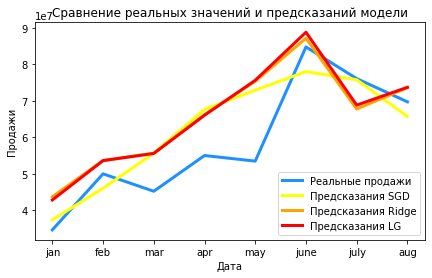

In [640]:
# добавим на график предсказания моделей и реальные значения
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(target_valid.values, color='dodgerblue', lw=3)
ax.plot(sgd_prediction, color='yellow', lw=3)
ax.plot(ridge_prediction, color='orange', lw=3)
ax.plot(lr_prediction, color='red', lw=3)

plt.title('Сравнение реальных значений и предсказаний модели')
plt.legend(('Реальные продажи', 'Предсказания SGD', 'Предсказания Ridge', 'Предсказания LG'), loc = 'lower right')
plt.xlabel('Дата')
plt.ylabel('Продажи')

ax.set_xticks(range(0,8))
ax.set_xticklabels(['jan','feb','mar','apr','may','june','july','aug'])
plt.show()

## Прогноз

Распределим 5500 TRP по месяцам в течении года. Мы определили, что закупать рекламу лучше во второй половине года. Проверим три гипотезы:
1. Сумма продаж будет выше, если закупать рекламу во второй половине 2017 года. Предположим, что закупки рекламы на ТВ в остальные месяцы не будет.

2. Сумма продаж будет выше, если закупать каждый месяц одинаковое количество рейтинга.

3. Сумма продаж будет выше, если закупать больше рейтинга летом.

Для этого нам необходимо выполнить следующие шаги:
1. Добавить данные о 2017 в выборку
2. Разделить данные на 3 датасета по гипотезам
3. Спрогнозировать продажи с помощью уже обученной модели градиентного спуска
4. Посчитать суммы и визуализировать данные

In [641]:
# добавим даты в выборку
new_year = pd.to_datetime(['2017-01-15', '2017-02-15', '2017-03-15', '2017-04-15', '2017-05-15', '2017-06-15',
                            '2017-07-15', '2017-08-15', '2017-09-15', '2017-10-15', '2017-11-15', '2017-12-15'])

for date in new_year:
    data.loc[date] = [0, 0]

data.index = pd.to_datetime(data.index)

In [642]:
# распределим закуп ТВ рейтингов в течении 4 месяцев
future1 = data.copy()

future1.loc['2017-09-15':'2017-12-15', 'TRP'] = round(5500/4)

In [643]:
# распределим закуп ТВ рейтингов в течении года
future2 = data.copy()

future2.loc['2017-01-15':'2017-12-15', 'TRP'] = round(5500/12)

In [644]:
# распределим закуп ТВ рейтингов летом
future3 = data.copy()

future3.loc['2017-06-15':'2017-08-15', 'TRP'] = round(5500/3)

In [645]:
# функция для прогноза продаж
def forecast(df):
    
    predictions = []
    for month in new_year:
    
        # добавим признаки в выборки для предсказания
        future = seas(df)
        future = make_features(future, 12, 4)
    
        # удалим пропуски и переведем в тип int
        future = future.dropna()
        future['seasons'] = future['seasons'].astype('int64')
    
        # делаем предсказания
        prediction = sgd_model.predict(future.loc[month:month].drop('sales_rub', axis=1))
    
        # добавляем предсказания в датасет
        df.loc[month:month, 'sales_rub'] = round(int(prediction))
    
        predictions.append(prediction)
        
    return predictions

In [646]:
print ('Годовой доход, если закупать рекламу в конце года:', round(int(sum(forecast(future1))) / 1000000, 3), 'млн. руб')
print ('Годовой доход, если закупать рекламу год:', round(int(sum(forecast(future2))) / 1000000, 3), 'млн.руб')
print ('Годовой доход, если закупать рекламу летом:', round(int(sum(forecast(future3))) / 1000000, 3), 'млн.руб')

Годовой доход, если закупать рекламу в конце года: 470.557 млн. руб
Годовой доход, если закупать рекламу год: 469.312 млн.руб
Годовой доход, если закупать рекламу летом: 467.742 млн.руб


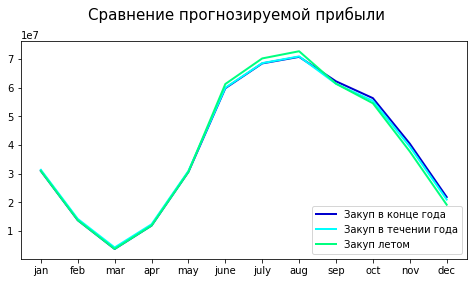

In [648]:
# визуализируем прогноз прибыли на 2017 год
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(forecast(future1), color='mediumblue', lw=2)
ax.plot(forecast(future2), color='cyan', lw=2)
ax.plot(forecast(future3), color='springgreen', lw=2)

fig.suptitle('Сравнение прогнозируемой прибыли', fontsize=15, y=1)

ax.set_xticks(range(0,12))
ax.set_xticklabels(['jan','feb','mar','apr','may','june','july','aug', 'sep', 'oct', 'nov', 'dec'])
plt.legend(('Закуп в конце года', 'Закуп в течении года', 'Закуп летом'), loc = 'lower right')
plt.show()

## Вывод

Ответы на вопросы:

**Как реклама на ТВ повлияла на продажи бренда?**
Реклама на ТВ линейно влияет на продажи бренда: чем выше траты на рекламу - выше ТВ рейтинги - выше продажи бренда.

**Какая количественная связь между продажами и рекламой?**
Между продажами и ТВ рекламой обнаружена линейная зависимость и наличие сильной положительной корреляции между данными признаками (0.77), в отличие от продаж и трат на медиа рекламу.

**Надо ли менять стратегию поддержки бренда в следующем году для ускорения роста продаж?**
Как показало исследование, количество ТВ рейтинга эффективно влияет на рост продаж, однако закупать рекламу на ТВ следует с осторожностью, в определенные месяцы эффективность такой рекламы падает.

Для выполнения поставленной задачи - построить модель для бренда X из фарм категории, которая спрогнозирует рост продаж, если в следующем году планируется закупка рекламы на ТВ для бренда Х в размере 5500 TRP, была выбрана модель стохастического градиентного спуска. Данная модель показала лучшее качество метрики R2 - 0.63.

С помощью данной модели был сделан прогноз по росту продаж в 2017 году и проверено 3 гипотезы.

**Рекомендация:**

Прогноз показал, что сумма продаж будет выше, если закупать рейтинг ближе к концу года - с сентября по декабрь.